# Replication assignment

Replicate the results found in [Bryant et al  (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), [Rozenberg et al (2014)](https://link.springer.com/content/pdf/10.1007/s10584-013-0904-3.pdf), and [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004). The data files are named accordingly. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for this week. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://www.sciencedirect.com/science/article/pii/S1364815215301092), which gives a succint summary of these three cases. 

An additional useful, if dated, resource for Bryant et al is https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/ 

mpld3 is no longer supported for python 3.6. Instead, use the `%matplotlib notebook` [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) for interaction with the trade-off curves. You can revert back to inline with `%matplotlib inline`



# Bryant & Lempert

In [3]:
data = pd.read_csv('./data/Bryant et al 2010.csv', index_col=None)
x = data.iloc[:, 2:11]
y = data.iloc[:, 15]

x = x.to_records()
y = y.values

In [4]:
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)

prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


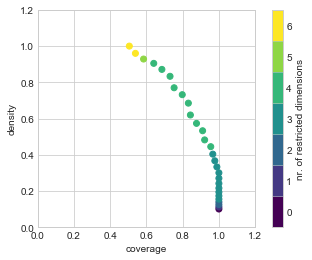

In [5]:
import matplotlib.pyplot as plt
 
box1.show_tradeoff()
plt.show()

coverage     0.752809
density      0.770115
mass        0.0986395
mean         0.770115
res dim             4
Name: 21, dtype: object

                            box 21                                      
                               min         max                 qp values
Demand elasticity        -0.422000   -0.202000  [1.1849299115762218e-16]
Biomass backstop price  150.049995  199.600006   [3.515112530263049e-11]
Total biomass           450.000000  755.799988   [4.716968553178765e-06]
Cellulosic cost          72.650002  133.699997     [0.15741333528927348]



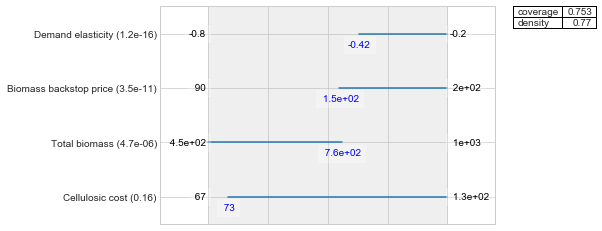

In [6]:
box1.inspect(21)
box1.inspect(21, style='graph')
plt.show()

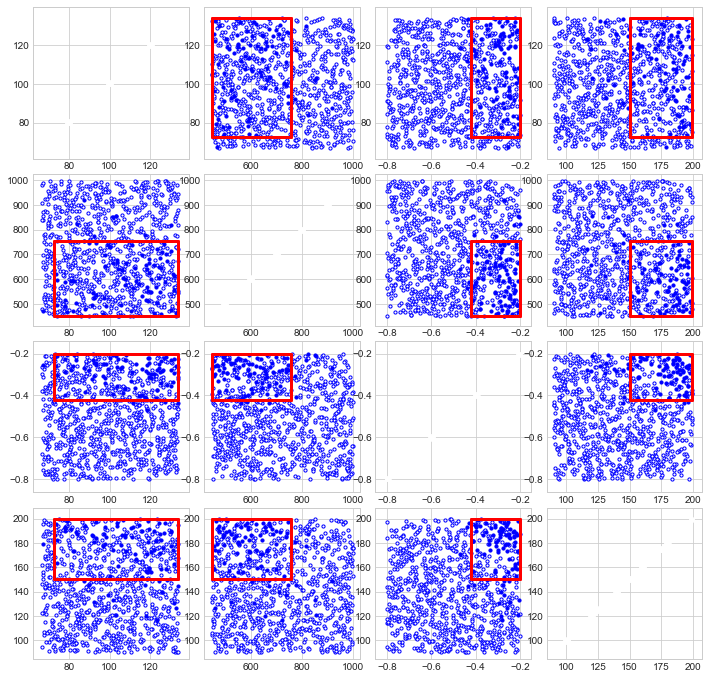

In [8]:
box1.select(21)
fig = box1.show_pairs_scatter()
fig.set_size_inches(12,12)
plt.show()

# Rozenberg et al

there are several issues with this case
* apply prim separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is too high in several cases
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM


In [13]:
data = pd.read_csv('./data/Rozenberg et al 2014.csv', index_col=None)
x = data.iloc[:, 0:7].to_records()
y = data.iloc[:, 7].values # change to higher index for different SSP's

In [16]:
# peel alpha controls the leniency of the algorithm, the higher the less lenient
# the meaning of peel_alpha is the percentile of the data that is to be removed
prim_obj = prim.Prim(x, y, mass_min=0.001, threshold=0.16, 
                     peel_alpha=0.01)
box1 = prim_obj.find_box()

[MainProcess/INFO] 286 points remaining, containing 44 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.027972027972027972, coverage: 0.18181818181818182, density: 1.0 restricted_dimensions: 4


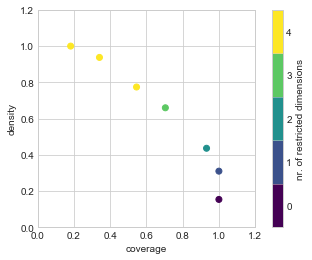

In [17]:
box1.show_tradeoff()
plt.show()

In [21]:
box1.inspect(3)
plt.show()

coverage    0.704545
density     0.659574
mass        0.164336
mean        0.659574
res dim            3
Name: 3, dtype: object

             box 3                              
               min  max                qp values
behaviors      1.0  1.0  [1.469768735781625e-06]
inequalities   1.0  1.0   [0.000977219127931685]
population     0.0  1.0   [0.005972420192480504]



# Hamarat et al

this is the most difficult dataset to analyze with prim. As can be seen by the results, PRIM fails to find a good explanation for why negative outcomes occur. 


In [22]:
from ema_workbench import load_results

results = load_results('./data/Hamarat et al 2013.gz')

[MainProcess/INFO] results loaded succesfully from /Users/jhkwakkel/Documents/workspace/epa1361/Week 2 - vulnerability analysis/data/Hamarat et al 2013.gz


In [23]:
experiments, outcomes = results

x = experiments

ooi = outcomes['fraction renewables']
y = ooi[:, -1] < ooi[:, 0]


In [24]:
prim_obj = prim.Prim(x, y, mass_min=0.05, threshold=0.1, peel_alpha=0.05)
box1 = prim_obj.find_box()

[MainProcess/INFO] 5000 points remaining, containing 871 cases of interest
[MainProcess/INFO] mean: 0.732824427480916, mass: 0.0524, coverage: 0.22043628013777267, density: 0.732824427480916 restricted_dimensions: 12


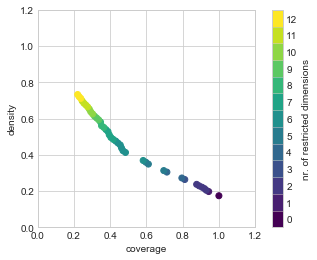

In [25]:
box1.show_tradeoff()
plt.show()